In [1]:
import pandas as pd

# Load the CSV file into a pandas DataFrame
df = pd.read_csv('../Covid_19 Project/neadat.csv')

# Print the data types of each column
print(df.dtypes)


file                        object
zcr                         object
energy                      object
energy_entropy              object
spectral_centroid           object
                             ...  
delta chroma_10             object
delta chroma_11             object
delta chroma_12             object
delta chroma_std            object
metadata_compiled.status    object
Length: 70, dtype: object


In [2]:

import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Read the CSV file


# Get the number of rows and columns
num_rows, num_cols = df.shape

# Create a 3D numpy array to store the data
data = np.zeros((num_rows, num_cols-2, 24))

# Loop through each row and column of the DataFrame
for i in range(num_rows):
    for j in range(1, num_cols-1):
        values = df.iloc[i, j]
        values = values.replace('[', '').replace(']', '').split(', ')
        values = [float(v) for v in values]
        # Pad the sequence with zeros to make it length 24
        padded_values = np.zeros(24)
        padded_values[:len(values)] = values
        data[i, j-1, :] = padded_values

# Reshape the data to a 3D matrix
data = data.reshape((num_rows, -1, 24))

output = df.iloc[:, -1].values

label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(output)

# Convert the numerical labels to one-hot encoded vectors
onehot_encoder = OneHotEncoder(sparse=False, categories='auto')
labels_onehot = onehot_encoder.fit_transform(labels_encoded.reshape(-1, 1))



In [3]:
import numpy as np
def NormalizeData(dt):
    return (dt - np.min(dt)) / (np.max(dt) - np.min(dt))
X = np.array(data)
scaled_x = NormalizeData(X)
print(X)

[[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  8.81017257e-02
    4.90463215e-02  5.99455041e-02]
  [ 4.92148920e-08  4.92148920e-08  4.92148920e-08 ...  1.79226535e-02
    3.18256651e-02  8.96712725e-03]
  [ 3.31851513e+00  3.31851513e+00  3.31851513e+00 ...  3.18977656e+00
    3.19920314e+00  3.16644931e+00]
  ...
  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ... -1.61887257e-02
    8.31544951e-02 -6.77849519e-02]
  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  7.60279262e-04
   -1.07989194e-03  4.98149680e-03]
  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ... -1.17396736e-02
    2.18169890e-02 -1.57396375e-02]]

 [[ 7.44777475e-02  7.62942779e-02  5.72207084e-02 ...  6.81198910e-02
    5.81289737e-02  5.17711172e-02]
  [ 6.38268534e-02  4.84629162e-02  5.51602157e-02 ...  4.32908613e-03
    4.16512662e-02  1.58931829e-02]
  [ 2.82240837e+00  3.03698096e+00  3.07573740e+00 ...  2.99709138e+00
    2.75382357e+00  2.48133430e+00]
  ...
  [ 0.00000000e+00  6.0

In [4]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

x = np.transpose(X, axes=(0, 2, 1))
y = output.reshape((-1, 1))
# Use label encoding to convert the categorical labels to integer labels
le = LabelEncoder()
y = le.fit_transform(y)

# Use one-hot encoding to convert the integer labels to binary vectors
y = to_categorical(y)

# Print the shapes of the input and output data
print('Input shape:', x.shape)
print('Output shape:', y.shape)

Input shape: (7838, 24, 68)
Output shape: (7838, 2)


c:\Users\User\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [5]:
from sklearn.model_selection import train_test_split
import numpy as np
import keras as ks
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout


# convert data to numpy arrays
X = np.array(x)
y = np.array(y)


In [32]:
import keras as ks 
# split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Define input and output shapes
n_timesteps = 24
n_features = 68 
n_outputs = 2

# Define number of LSTM units
n_units = 64

# Define droupout rate
Dropout_rate = 0.2

# Define learning rate
learning_rate = 0.001

# Define activation_function 
activation_function = 'softmax'

# Define the LSTM model
model_lstm = Sequential()
model_lstm.add(LSTM(n_units, input_shape=(n_timesteps, n_features),return_sequences=True))
model_lstm.add(LSTM(64))


model_lstm.add(Dense(128, activation='relu'))
model_lstm.add(Dropout(Dropout_rate))

model_lstm.add(Dense(256, activation='softmax'))
model_lstm.add(Dropout(Dropout_rate))

model_lstm.add(Dense(128, activation='relu'))
model_lstm.add(Dropout(Dropout_rate))

model_lstm.add(Dense(64, activation='softmax'))
model_lstm.add(Dropout(Dropout_rate))

model_lstm.add(Dense(32, activation='relu'))
model_lstm.add(Dropout(Dropout_rate))

model_lstm.add(Dense(16, activation='softmax'))
model_lstm.add(Dropout(Dropout_rate))

model_lstm.add(Dense(8, activation='softmax'))
model_lstm.add(Dropout(Dropout_rate))

model_lstm.add(Dense(2, activation='softmax'))


# Compile the LSTM model
optimiser = ks.optimizers.Adam(learning_rate=0.0001)
model_lstm.compile(loss='binary_crossentropy', optimizer= optimiser, metrics=['accuracy'])

# Compile the cnn model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the LSTM model
history = model_lstm.fit(X_train, y_train, epochs=300, batch_size=32, validation_split=0.2)



Epoch 1/300
138/138 [==============================] - 7s 26ms/step - loss: 0.7035 - accuracy: 0.3662 - val_loss: 0.6951 - val_accuracy: 0.0965
Epoch 2/300
138/138 [==============================] - 3s 23ms/step - loss: 0.6886 - accuracy: 0.5855 - val_loss: 0.6798 - val_accuracy: 0.9035
Epoch 3/300
138/138 [==============================] - 3s 22ms/step - loss: 0.6731 - accuracy: 0.7172 - val_loss: 0.6647 - val_accuracy: 0.9035
Epoch 4/300
138/138 [==============================] - 3s 22ms/step - loss: 0.6590 - accuracy: 0.8156 - val_loss: 0.6499 - val_accuracy: 0.9035
Epoch 5/300
138/138 [==============================] - 3s 22ms/step - loss: 0.6427 - accuracy: 0.8642 - val_loss: 0.6354 - val_accuracy: 0.9035
Epoch 6/300
138/138 [==============================] - 3s 21ms/step - loss: 0.6286 - accuracy: 0.8911 - val_loss: 0.6206 - val_accuracy: 0.9035
Epoch 7/300
138/138 [==============================] - 3s 21ms/step - loss: 0.6132 - accuracy: 0.8986 - val_loss: 0.6055 - val_accuracy:

In [33]:
lstm_loss, lstm_accuracy = model_lstm.evaluate(X_test, y_test)
print("LSTM - Loss: {:.4f}, Accuracy: {:.4f}".format(lstm_loss, lstm_accuracy))

74/74 [==============================] - 1s 8ms/step - loss: 0.2891 - accuracy: 0.9162
LSTM - Loss: 0.2891, Accuracy: 0.9162


In [38]:
y_pred = model_lstm.predict(X_test)
for i in  range(30):
    print(y_pred[i], y_test[i])

74/74 [==============================] - 1s 9ms/step
[0.01167837 0.9883216 ] [0. 1.]
[0.01167837 0.9883216 ] [0. 1.]
[0.01167837 0.9883216 ] [0. 1.]
[0.01167837 0.9883216 ] [0. 1.]
[0.01167837 0.9883216 ] [0. 1.]
[0.01167837 0.9883216 ] [0. 1.]
[0.01167837 0.9883216 ] [0. 1.]
[0.01167837 0.9883216 ] [0. 1.]
[0.01167837 0.9883216 ] [0. 1.]
[0.01167837 0.9883216 ] [0. 1.]
[0.01167837 0.9883216 ] [0. 1.]
[0.01167837 0.9883216 ] [0. 1.]
[0.01167837 0.9883216 ] [0. 1.]
[0.01167837 0.9883216 ] [0. 1.]
[0.01167837 0.9883216 ] [0. 1.]
[0.01167837 0.9883216 ] [0. 1.]
[0.01167837 0.9883216 ] [0. 1.]
[0.01167837 0.9883216 ] [0. 1.]
[0.01167837 0.9883216 ] [0. 1.]
[0.01167837 0.9883216 ] [0. 1.]
[0.01167837 0.9883216 ] [0. 1.]
[0.01167837 0.9883216 ] [0. 1.]
[0.01167837 0.9883216 ] [1. 0.]
[0.01167837 0.9883216 ] [1. 0.]
[0.01167837 0.9883216 ] [0. 1.]
[0.01167837 0.9883216 ] [0. 1.]
[0.01167837 0.9883216 ] [0. 1.]
[0.01167837 0.9883216 ] [0. 1.]
[0.01167837 0.9883216 ] [0. 1.]
[0.01167837 0.98832

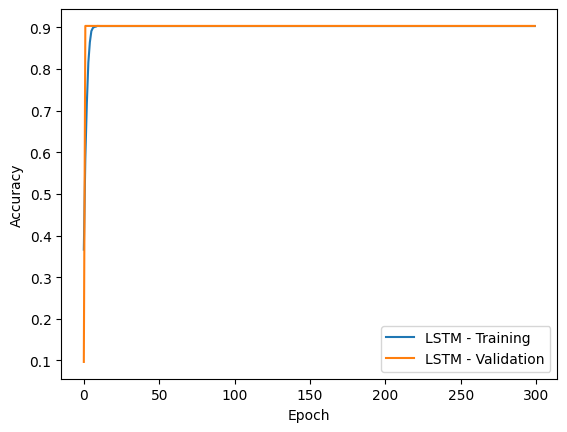

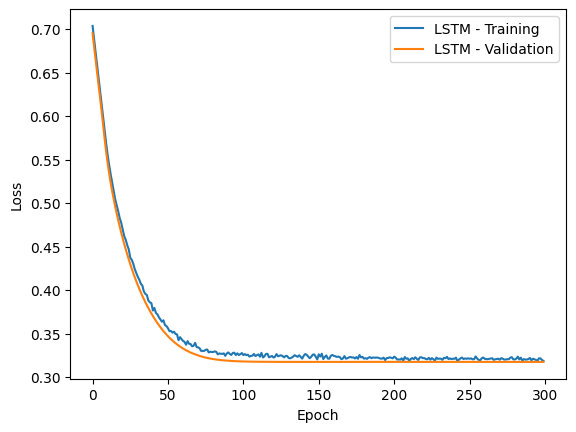

In [35]:
import matplotlib.pyplot as plt



# Plot the training and validation accuracy of each model

plt.plot(history.history['accuracy'], label='LSTM - Training')
plt.plot(history.history['val_accuracy'], label='LSTM - Validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot the training and validation loss of each model

plt.plot(history.history['loss'], label='LSTM - Training')
plt.plot(history.history['val_loss'], label='LSTM - Validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


74/74 [==============================] - 1s 9ms/step


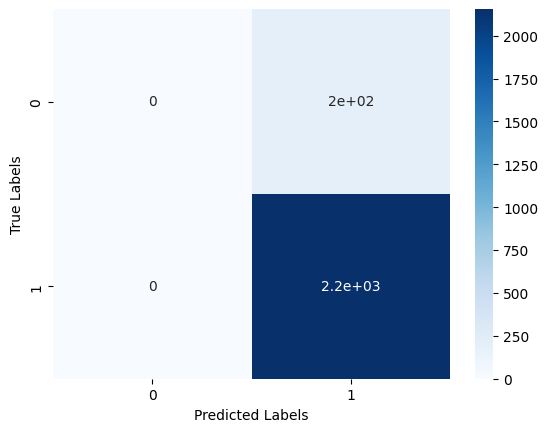

In [36]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Make predictions on the test set
y_pred = model_lstm.predict(X_test)

# Convert the predicted probabilities to class labels
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(y_true_labels, y_pred_labels)

# Plot the confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()